In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
mydata = pd.read_csv('AswanData_weatherdata.csv')

In [3]:
mydata.head(10)

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
0,0,4/1/2022,87.9,31.3,13.4,5.7,29.2,19.010857
1,2,4/3/2022,90.2,34.0,14.2,6.6,29.1,16.885714
2,3,4/4/2022,93.2,31.4,11.8,8.8,29.1,19.627429
3,4,4/5/2022,92.5,24.9,9.4,8.0,29.1,18.929429
4,5,4/6/2022,91.2,18.9,7.8,9.4,29.2,18.934000
5,6,4/7/2022,94.0,26.3,9.4,11.0,29.2,17.435143
6,7,4/8/2022,92.3,24.9,10.0,6.5,29.1,16.717714
7,8,4/9/2022,92.5,30.4,11.9,8.9,29.1,17.146286
8,9,4/10/2022,90.6,32.0,13.3,8.5,29.1,15.938857
9,10,4/11/2022,89.9,30.4,12.3,7.9,29.1,16.939143


In [4]:
mydata.tail(10)

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
388,412,4/21/2021,85.3,37.8,19.2,8.0,29.1,32.446571
389,413,4/22/2021,86.5,36.1,18.3,8.6,29.1,33.736571
390,414,4/23/2021,86.1,30.9,14.3,7.8,29.1,30.905143
391,415,4/24/2021,79.0,38.6,26.6,8.2,29.1,33.850857
392,416,4/25/2021,83.3,39.4,21.8,12.7,29.1,33.194286
393,417,4/26/2021,78.3,40.1,26.8,7.3,29.2,34.996286
394,418,4/27/2021,75.2,32.3,17.6,6.6,29.2,37.427429
395,419,4/28/2021,86.6,37.0,21.4,16.9,29.0,33.623429
396,420,4/29/2021,86.1,35.1,17.1,14.5,29.1,34.010286
397,421,4/30/2021,81.9,25.3,14.1,12.7,29.2,35.110000


In [5]:
mydata.sample(15)

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
123,130,1/14/2022,61.3,33.8,36.2,8.3,29.3,14.325429
40,42,4/14/2022,78.9,24.9,16.4,8.1,29.1,19.553714
164,177,12/31/2021,66.7,37.1,35.1,13.1,29.3,30.112000
59,61,3/4/2022,67.2,29.5,26.1,10.3,29.3,23.185143
199,216,10/9/2021,89.6,46.4,23.2,12.1,29.1,21.040857
270,287,8/19/2021,92.7,44.2,19.5,11.1,29.0,19.789143
310,329,7/30/2021,95.9,42.3,16.4,11.5,29.0,25.984571
22,23,4/24/2022,84.2,21.4,10.1,4.6,29.0,20.663143
340,362,5/2/2021,91.6,34.4,13.5,8.5,29.1,35.938857
66,69,3/12/2022,61.4,27.3,28.9,11.2,29.3,30.080857


In [6]:
mydata.info

<bound method DataFrame.info of      Unnamed: 0       Date  AvgTemperture  AverageDew(point via humidity)  \
0             0   4/1/2022           87.9                            31.3   
1             2   4/3/2022           90.2                            34.0   
2             3   4/4/2022           93.2                            31.4   
3             4   4/5/2022           92.5                            24.9   
4             5   4/6/2022           91.2                            18.9   
..          ...        ...            ...                             ...   
393         417  4/26/2021           78.3                            40.1   
394         418  4/27/2021           75.2                            32.3   
395         419  4/28/2021           86.6                            37.0   
396         420  4/29/2021           86.1                            35.1   
397         421  4/30/2021           81.9                            25.3   

     Humidity  Wind  Pressure  Solar(PV)  


In [7]:
mydata.dtypes

Unnamed: 0                          int64
Date                               object
AvgTemperture                     float64
AverageDew(point via humidity)    float64
Humidity                          float64
Wind                              float64
Pressure                          float64
Solar(PV)                         float64
dtype: object

In [9]:
mydata.shape

(398, 8)

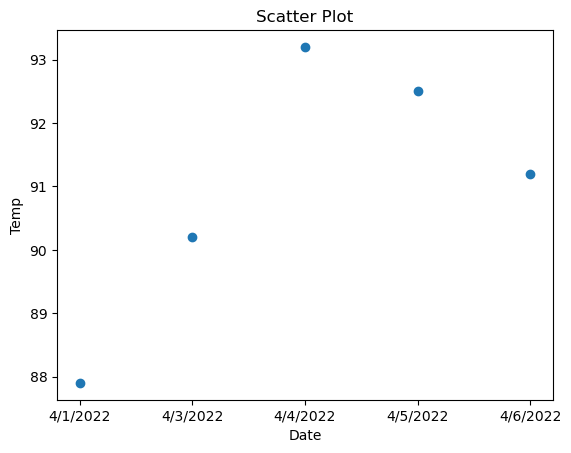

In [13]:
#Scatter Plot (males)

mydata5 = mydata.iloc[:5]
x = mydata5['Date']
y = mydata5['AvgTemperture']
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Scatter Plot')
plt.show()

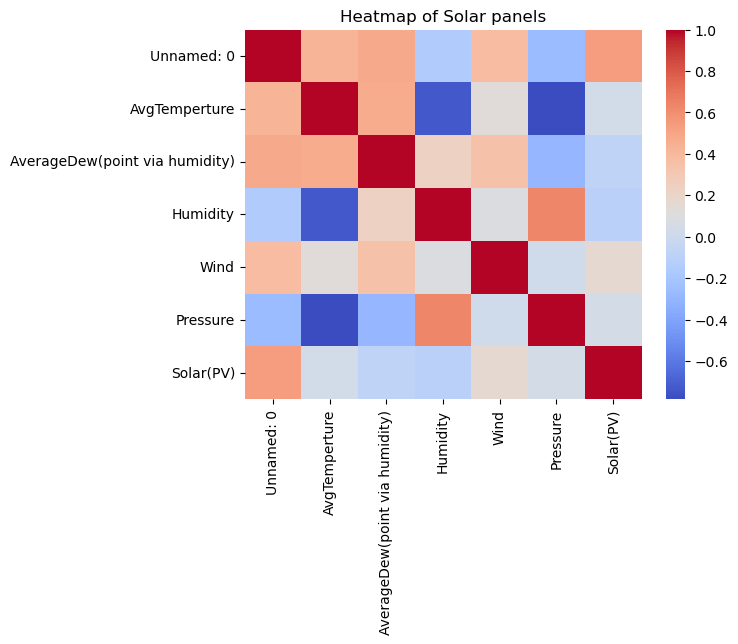

In [14]:
matrix = mydata.corr()
sns.heatmap(matrix , cmap='coolwarm')
plt.title('Heatmap of Solar panels')
plt.show()

In [15]:
mydata.columns

Index(['Unnamed: 0', 'Date', 'AvgTemperture', 'AverageDew(point via humidity)',
       'Humidity', 'Wind', 'Pressure', 'Solar(PV)'],
      dtype='object')

In [16]:
#Checking for Null Values

mydata.isnull().sum()

Unnamed: 0                        0
Date                              0
AvgTemperture                     0
AverageDew(point via humidity)    0
Humidity                          0
Wind                              0
Pressure                          0
Solar(PV)                         0
dtype: int64

In [17]:
#Checking for not a number values - axis = 0

mydata.isna().any(axis=0)

Unnamed: 0                        False
Date                              False
AvgTemperture                     False
AverageDew(point via humidity)    False
Humidity                          False
Wind                              False
Pressure                          False
Solar(PV)                         False
dtype: bool

In [18]:
#Checking for not a number values - axis = 1

mydata.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [19]:
#Checking for duplicated values

mydata[mydata.duplicated()]

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)


In [21]:
#Number of duplicated rows in model column 

mydata.duplicated('Date').sum()

28

In [22]:
#Dropping the rows that contain duplicated values

mydata.drop_duplicates(subset=['Date'], inplace=True)

In [23]:
mydata.duplicated('Date').sum()

0

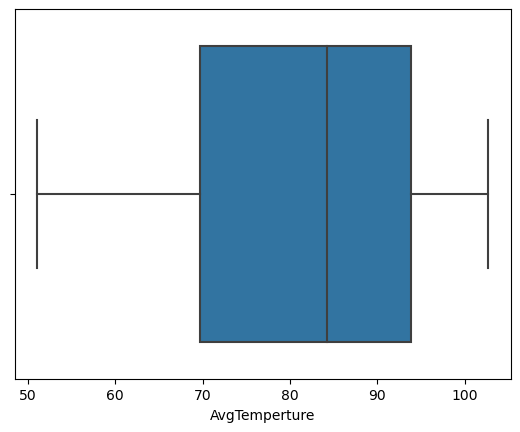

In [25]:
#Boxplot

sns.boxplot(x=mydata["AvgTemperture"])
plt.show() 

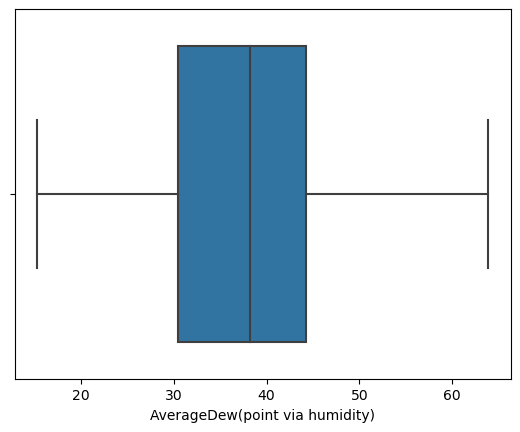

In [26]:
#Boxplot

sns.boxplot(x=mydata["AverageDew(point via humidity)"])
plt.show()

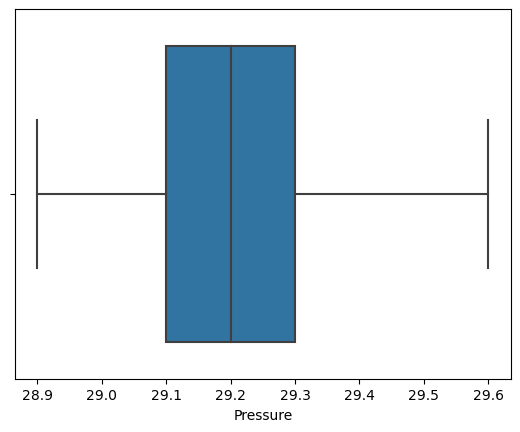

In [27]:
#Boxplot

sns.boxplot(x=mydata['Pressure'])
plt.show()

Text(0, 0.5, 'Number')

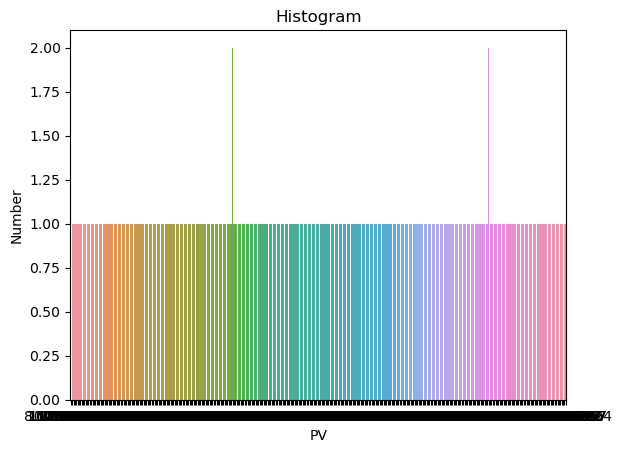

In [28]:
#Histogram

sns.countplot(data=mydata , x='Solar(PV)')
plt.title('Histogram')
plt.xlabel('PV')
plt.ylabel('Number')

In [29]:
mydata.mean()

/var/folders/pb/0_h9v7n92911806r472ls_kc0000gn/T/ipykernel_3394/4263788547.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.mean()


Unnamed: 0                        224.151351
AvgTemperture                      81.405676
AverageDew(point via humidity)     37.460811
Humidity                           23.753784
Wind                               10.314865
Pressure                           29.190135
Solar(PV)                          24.800943
dtype: float64

In [30]:
mydata.var()

/var/folders/pb/0_h9v7n92911806r472ls_kc0000gn/T/ipykernel_3394/1215635467.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.var()


Unnamed: 0                        13877.901150
AvgTemperture                       194.916743
AverageDew(point via humidity)       76.550682
Humidity                             92.956205
Wind                                  6.024575
Pressure                              0.020153
Solar(PV)                            57.734326
dtype: float64

In [31]:
mydata.std()

/var/folders/pb/0_h9v7n92911806r472ls_kc0000gn/T/ipykernel_3394/4159344101.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.std()


Unnamed: 0                        117.804504
AvgTemperture                      13.961259
AverageDew(point via humidity)      8.749325
Humidity                            9.641380
Wind                                2.454501
Pressure                            0.141962
Solar(PV)                           7.598311
dtype: float64

In [32]:
covariance = mydata.cov()
print(covariance)

                                  Unnamed: 0  AvgTemperture  \
Unnamed: 0                      13877.901150     843.141415   
AvgTemperture                     843.141415     194.916743   
AverageDew(point via humidity)    436.984267      64.519938   
Humidity                         -339.257214     -99.393423   
Wind                               97.092324       6.119590   
Pressure                           -6.158665      -1.568081   
Solar(PV)                         457.134274       6.609464   

                                AverageDew(point via humidity)    Humidity  \
Unnamed: 0                                          436.984267 -339.257214   
AvgTemperture                                        64.519938  -99.393423   
AverageDew(point via humidity)                       76.550682   12.601463   
Humidity                                             12.601463   92.956205   
Wind                                                  6.515869    0.301393   
Pressure                   

In [33]:
correlation = mydata.corr()
print(correlation)

                                Unnamed: 0  AvgTemperture  \
Unnamed: 0                        1.000000       0.512642   
AvgTemperture                     0.512642       1.000000   
AverageDew(point via humidity)    0.423964       0.528196   
Humidity                         -0.298695      -0.738404   
Wind                              0.335784       0.178581   
Pressure                         -0.368259      -0.791176   
Solar(PV)                         0.510699       0.062305   

                                AverageDew(point via humidity)  Humidity  \
Unnamed: 0                                            0.423964 -0.298695   
AvgTemperture                                         0.528196 -0.738404   
AverageDew(point via humidity)                        1.000000  0.149385   
Humidity                                              0.149385  1.000000   
Wind                                                  0.303413  0.012736   
Pressure                                             -0

Accuracy: 0.05405405405405406


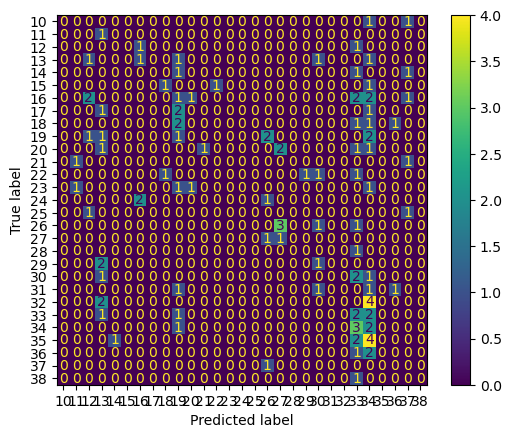

Precision score:  0.01462324393358876
Recall score:  0.045155993431855494
F1 score:  0.021735221825965927


/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
#Naive Bayes Classifier ___________________________________________________________________________________________

#we should use regression better because our target is float 

# define the features and target variables

X = mydata[[ 'AvgTemperture' , 'AverageDew(point via humidity)'  , 'Wind' , 'Pressure' ]] 
y = mydata['Solar(PV)']
y=y.astype('int')
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# train the model
model = GaussianNB()
model.fit(X_train, y_train)

# test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print('Precision score: ', format(precision_score(y_test, y_pred , average='macro'))) # average = binary doesn't work
print('Recall score: ', format(recall_score(y_test, y_pred , average='macro')))
print('F1 score: ', format(f1_score(y_test, y_pred , average='macro')))

In [58]:
#Linear Regression ________________________________________________________________________________________________


mydata = pd.read_csv('AswanData_weatherdata.csv')


X = mydata[[ 'AvgTemperture' , 'AverageDew(point via humidity)'  , 'Wind' , 'Pressure' ]] 
y = mydata['Solar(PV)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
prediction = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print(score)
print(prediction)


0.010245848276775327
[21.05968162 25.91066914 21.93369924 23.8539184  27.8662399  28.12038536
 23.60851916 23.02649357 23.39786079 26.35208513 23.73370207 23.58841967
 24.60008923 22.05555311 27.60476162 23.46137821 24.3122431  24.01898164
 25.57413283 23.95673801 22.90911178 25.71770267 22.54460743 22.51314732
 22.8463326  23.83216247 23.31637984 22.54460743 23.34411965 25.6691742
 22.12530669 30.43979331 23.906359   21.98592034 22.46399824 25.4654977
 20.00264125 21.29255874 24.74407072 28.60166161 26.39152916 24.04315454
 25.9041094  24.87549427 24.73358221 22.30841899 29.31886227 22.76883295
 25.34650237 22.99495172 23.37266226 20.98160404 25.3578957  23.79599714
 22.48758922 24.48198267 24.76226667 25.61055501 23.78825199 22.35186174
 26.31034032 24.7946878  22.69566493 26.22308847 21.82528413 28.3115951
 24.73130791 24.11664348 26.77781909 22.28398929 29.97359254 25.71267041
 24.17166036 26.0886838  24.57882759 24.1590647  25.43166652 21.75764743
 22.47614918 27.24748016 21.80805

In [59]:
#Analysis of linear regression 

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To do so, we will use our test data and see how accurately our algorithm predicts the percentage score
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.4156004259625465
Mean Squared Error: 55.89496989740043
Root Mean Squared Error: 7.4762938610919
